# ITMAL Øvelser - Artificial Neural Networkds

## Øvelse 1:

Afprøv Scikit-learns version af supervised neural network – mere specifikt arbejder vi her med 2-lags Multi Layer Perceptron (klassisk feedforward ANN, der findes mange andre typer ANNs). Scikit Learns funktion til regression hedder MLPRegression.
OBS: Når I laver dybe neurale netværk (DNN) – herunder CNN etc., så er det nok bedre at bruge andre biblioteker såsom Keras. Men Scikit learns funktion er ret simpel og god til denne opgave.
Vi antager at I har fået data, som beskrevet nederst i ”ANN_example.py” (i denne uges materiale) – dvs. feature x = np.linspace(-10,10,1000) og output værdi y = np.sinc(x), altså en såkaldt sinc-funktion (Bemærk – det her er blot til illustration af, at MLP regressionsmodeller kan fitte vilkårlige funktioner, og også i flere dimensioner). Opgaven er nu at ”lære”/”træne” netværket til dette output.

### a. Fit modellen til data. Benyt i starten kun 2 skjulte neuroner (hidden_layer_sizes)

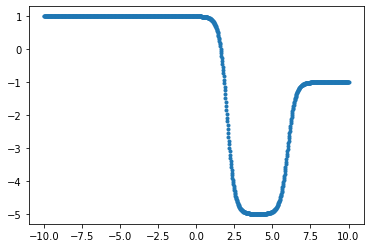

In [129]:
x = np.linspace(-10,10,1000)
y = 2*np.tanh(2*x - 12) - 3*np.tanh(2*x - 4)

plt.plot(x, y, '.')

x = x.reshape(-1,1) # Scikit-algoritmer kræver (:,1)-format

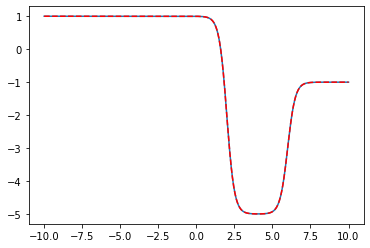

In [130]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh', # aktiveringsfunktion 
                   hidden_layer_sizes = 2, # antal skjulte neuroner
                   alpha = 1e-5, # regulariseringsparameter, her meget lille
                   solver = 'lbfgs', # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)
mlp.fit(x,y)

plt.plot(x,y)
plt.plot(x, mlp.predict(x), '--', color='Red')

In [141]:
print('Hidden layer:')
print('1st Neuron:')
print(f'Input: {mlp.coefs_[0][0][0]:.2f} Bias: {mlp.intercepts_[0][0]:.2f}\n')
print('2nd Neuron:')
print(f'Input: {mlp.coefs_[0][0][1]:.2f} Bias: {mlp.intercepts_[0][1]:.2f}\n')
print('Output layer')
print(f'1st Neuron: {mlp.coefs_[1][0][0]:.2f} 2nd Neuron: {mlp.coefs_[1][1][0]:.2f} Bias: {mlp.intercepts_[1][0]:.2f}\n')

Hidden layer:
1st Neuron:
Input: -2.00 Bias: 4.00

2nd Neuron:
Input: -2.00 Bias: 12.00

Output layer
1st Neuron: 3.00 2nd Neuron: -2.00 Bias: 0.00



### b. Tegn den grafiske model for netværket – skriv vægtenes værdi på grafen (gerne i hånden). Husk bias.
![title](MLP_diagram.png)

### c. Opskriv udtrykket for y – dvs. i stil med y = 0.3* tanh(2 * x + 0.1) + 0.3 * tanh(5 * x + 3) + 1. OBS: I kan godt nøjes med fx. 1-2 betydende decimaler.

In [142]:
y = 3 * np.tanh(-2 * x + 4) - 2 * np.tanh(-2 * x + 12) + 0

### d. Plot funktionen vha. ”np.tanh” – dvs. i stil med ”y = 0.3*np.tanh(2 * x +...” hvor x er input data.

Text(0, 0.5, 'y-value')

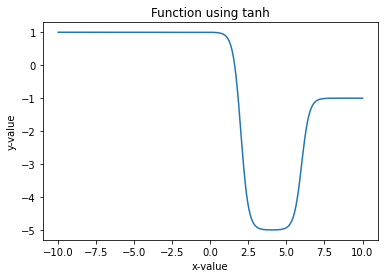

In [143]:
plt.plot(x, y)
plt.title('Function using tanh')
plt.xlabel('x-value')
plt.ylabel('y-value')

### e. Plot også første del af funktionen samt anden del, hver for sig (fx. ”0.3* tanh(2 * x + 0.1)” og ” 0.3 * tanh(5 * x + 3)”) – summen af disse to skal jo gerne give den samlede funktion (pånær bias-leddet)

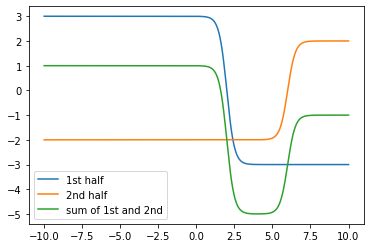

In [147]:
y1 = 3 * np.tanh(-2 * x + 4)
y2 = -2 * np.tanh(-2 * x + 12) + 0

plt.plot(x, y1, label=('1st half'))
plt.plot(x, y2, label=('2nd half'))
plt.plot(x, y1 + y2, label=('sum of 1st and 2nd'))
plt.legend()

### f. Prøv også at fitte funktionen med flere led (fx. 5). Plot resultatet.

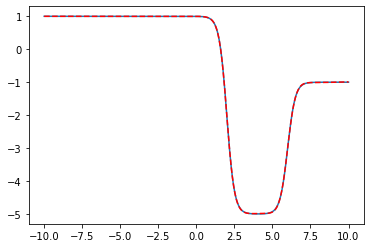

In [149]:
x = np.linspace(-10,10,1000)
y = 2*np.tanh(2*x - 12) - 3*np.tanh(2*x - 4)

mlp = MLPRegressor(activation = 'tanh', # aktiveringsfunktion 
                   hidden_layer_sizes = 5, # antal skjulte neuroner
                   alpha = 1e-5, # regulariseringsparameter, her meget lille
                   solver = 'lbfgs', # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)

x = x.reshape(-1,1)
mlp.fit(x,y)

plt.plot(x,y)
plt.plot(x, mlp.predict(x), '--', color='Red')

### g. Optional : Prøv at ændre alpha til fx. 1e5 og 1e-1 – forklar hvad der sker (tip: regularisering).

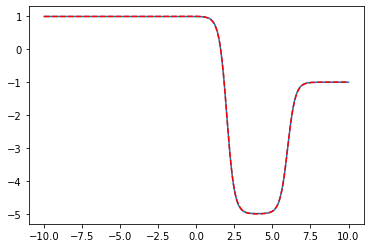

In [155]:
mlp = MLPRegressor(activation = 'tanh', # aktiveringsfunktion 
                   hidden_layer_sizes = 5, # antal skjulte neuroner
                   alpha = 1e-1, # regulariseringsparameter, her meget lille
                   solver = 'lbfgs', # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)

x = x.reshape(-1,1)
mlp.fit(x,y)

plt.plot(x,y)
plt.plot(x, mlp.predict(x), '--', color='Red')

Hvis alpha blive for stor ville modellen blive dårlig til at predict da de step der bliver taget i optimerings processen bliver for store